<a href="https://colab.research.google.com/github/ritzy0407/Skill/blob/main/Skill_expt7_chi_squared_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.datasets import load_breast_cancer
# Load dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
# Quick overview of the data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


                    Feature     Chi2 Score        p-value
0               mean radius     266.104917   8.013976e-60
1              mean texture      93.897508   3.322922e-22
2            mean perimeter    2011.102864   0.000000e+00
3                 mean area   53991.655924   0.000000e+00
4           mean smoothness       0.149899   6.986316e-01
5          mean compactness       5.403075   2.010130e-02
6            mean concavity      19.712354   9.001757e-06
7       mean concave points      10.544035   1.165636e-03
8             mean symmetry       0.257380   6.119260e-01
9    mean fractal dimension       0.000074   9.931222e-01
10             radius error      34.675247   3.895534e-09
11            texture error       0.009794   9.211682e-01
12          perimeter error     250.571896   1.948775e-56
13               area error    8758.504705   0.000000e+00
14         smoothness error       0.003266   9.544251e-01
15        compactness error       0.613785   4.333661e-01
16          co

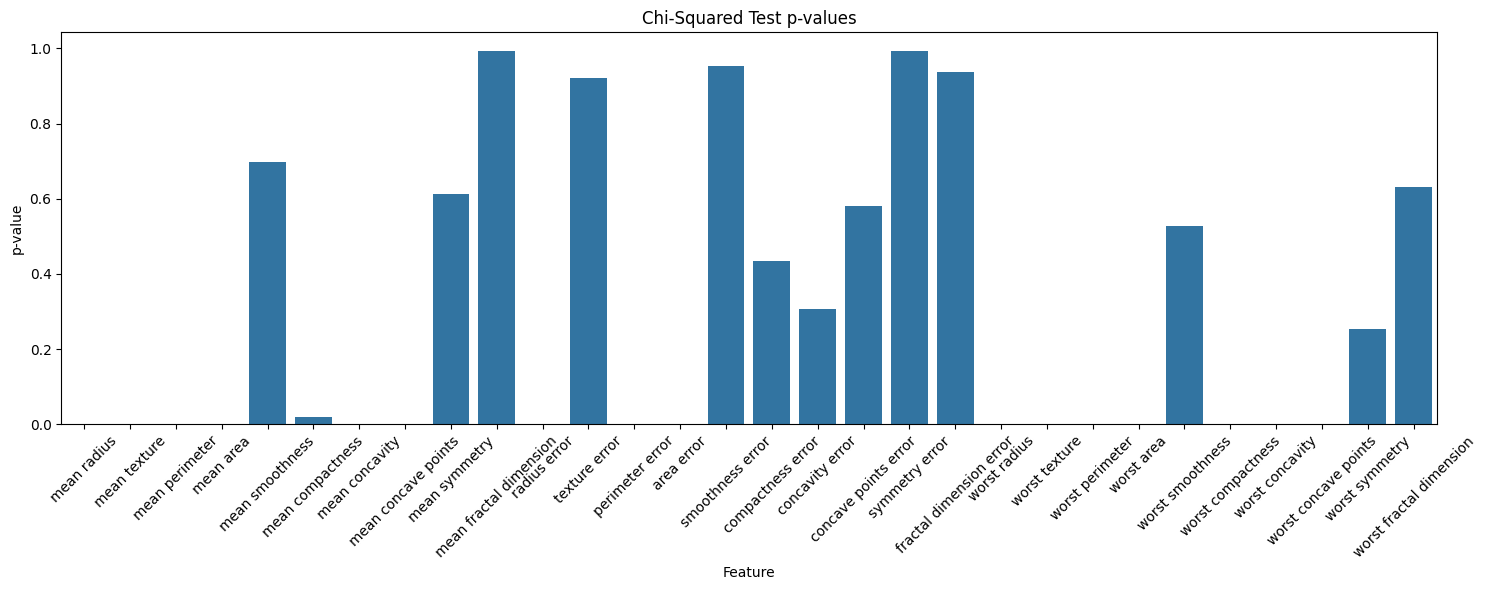

In [ ]:
# Encoding categorical variables if needed (example for a binary target)
target = 'target'  # Replace with your actual target column name
X = df.drop(columns=[target])
y = df[target]

# Encode categorical features if necessary
for col in X.select_dtypes(include=['object']).columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Chi-squared test
chi_scores, p_values = chi2(X, y)

# Results as DataFrame
chi2_results = pd.DataFrame({'Feature': X.columns, 'Chi2 Score': chi_scores, 'p-value': p_values})
print(chi2_results)

# Plotting the p-values
plt.figure(figsize=(15, 6))
sns.barplot(x='Feature', y='p-value', data=chi2_results)
plt.xticks(rotation=45)
plt.title('Chi-Squared Test p-values')
plt.tight_layout()
plt.savefig('chi_squared_results.png')
plt.show()

In [ ]:
# Selecting only significant features
significant_features = chi2_results[chi2_results['p-value'] <= 0.05]['Feature']
X_selected = X[significant_features]


select appropriate feature

In [ ]:
# Get all feature names
all_features = X.columns.tolist()

# Selected features (p-value ≤ 0.05)
selected_features = significant_features.tolist()

# Removed features (p-value > 0.05)
removed_features = list(set(all_features) - set(selected_features))

# Display results
print("Selected Features (Retained):")
print(selected_features)

print("\nRemoved Features (Dropped):")
print(removed_features)


Selected Features (Retained):
['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean compactness', 'mean concavity', 'mean concave points', 'radius error', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst compactness', 'worst concavity', 'worst concave points']

Removed Features (Dropped):
['worst symmetry', 'texture error', 'mean fractal dimension', 'concavity error', 'symmetry error', 'compactness error', 'smoothness error', 'worst smoothness', 'worst fractal dimension', 'mean smoothness', 'mean symmetry', 'concave points error', 'fractal dimension error']
